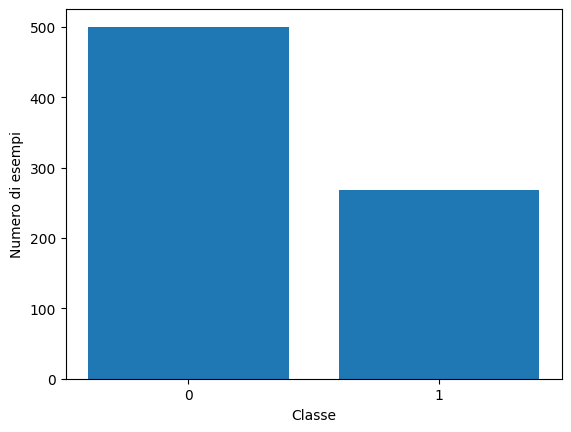

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
# e che la colonna target si chiami 'target'
data = pd.read_csv('Dataset/diabetes.csv')

class_counts = data['Outcome'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index)
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.show()

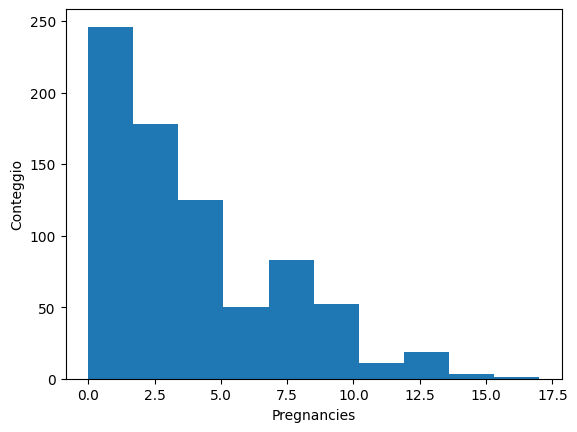

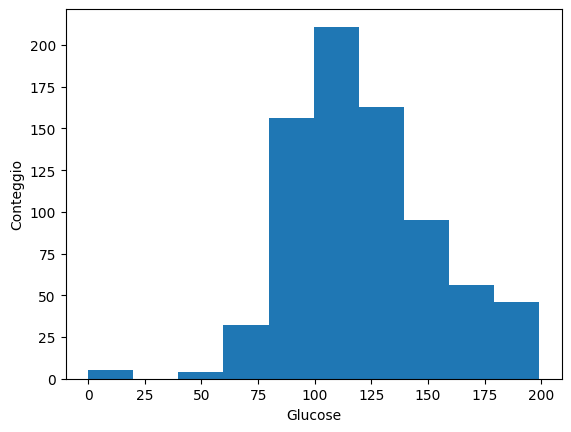

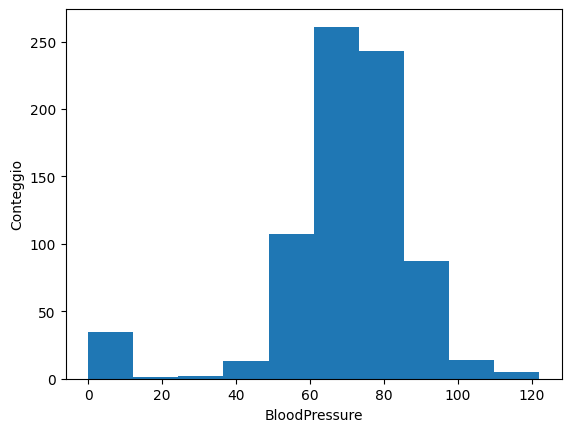

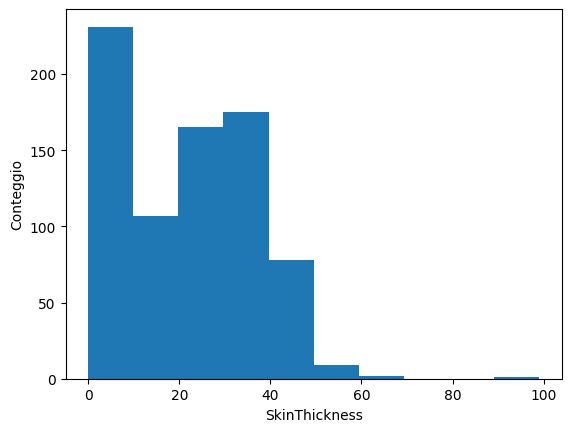

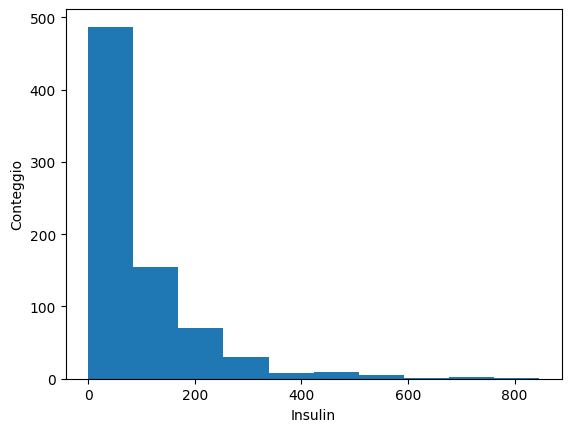

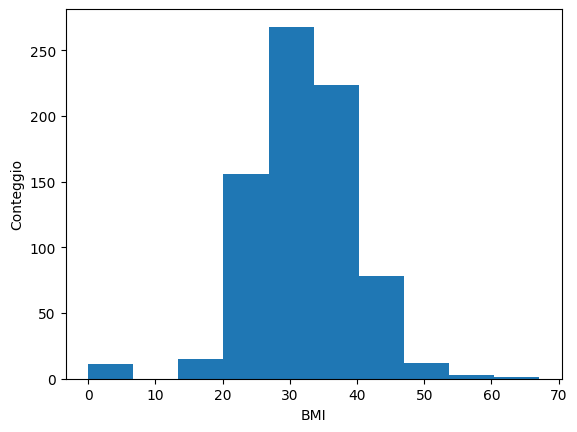

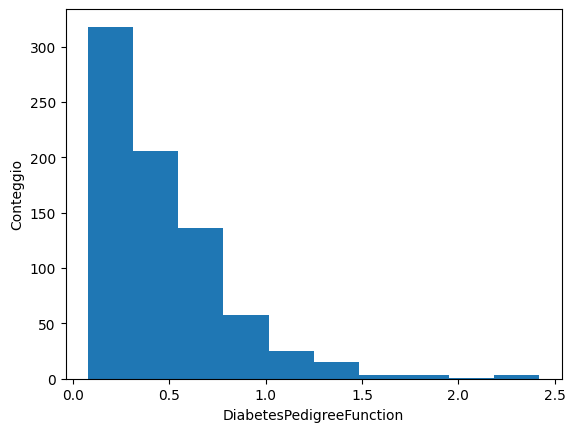

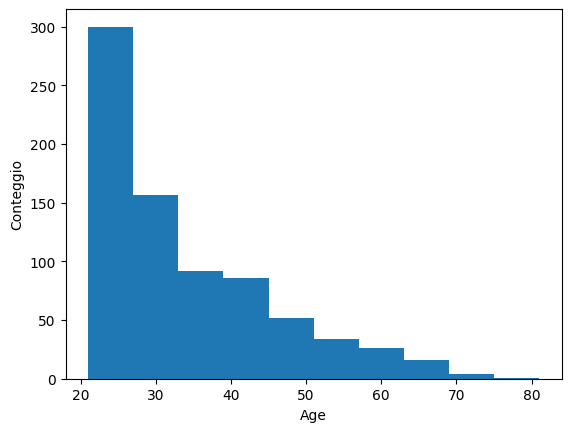

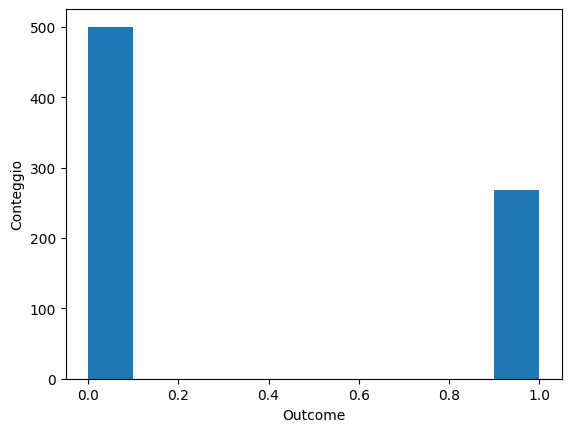

In [53]:
import matplotlib.pyplot as plt

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
# e che tu voglia creare un istogramma per ogni variabile
for column in data.columns:
    plt.hist(data[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()


                          Pregnancies   Glucose  BloodPressure  SkinThickness   
Pregnancies                  1.000000  0.129459       0.141282      -0.081672  \
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction   
Pregnancies              -0.073535  0.017683                 -0.033523  \
Glucose                   0.331357  0.221

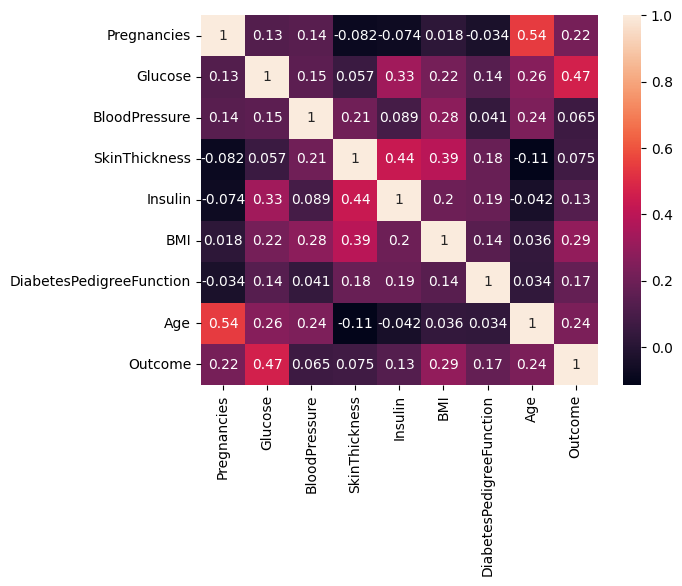

In [54]:
corr_matrix = data.corr()

# Ora puoi visualizzare la matrice di correlazione
print(corr_matrix)

import seaborn as sns

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
corr_matrix = data.corr()

# Ora puoi visualizzare la matrice di correlazione come un heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


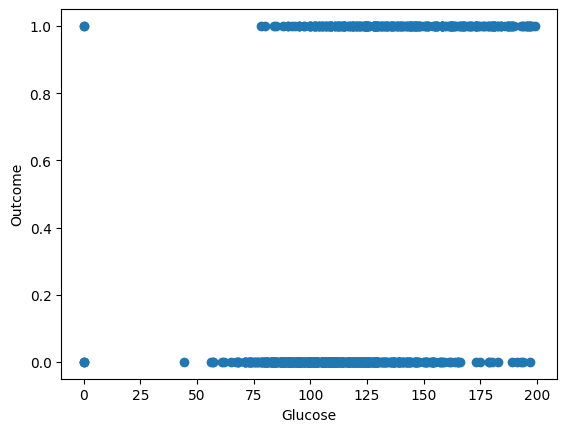

In [55]:
import matplotlib.pyplot as plt

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
# e che tu voglia creare un grafico a dispersione per la variabile 'Glucose'
plt.scatter(data['Glucose'], data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

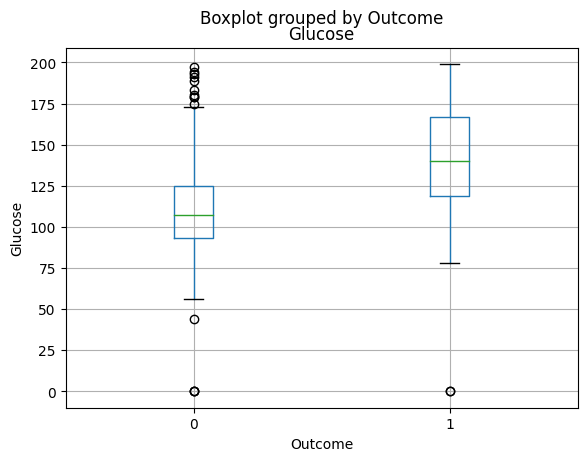

In [56]:
import matplotlib.pyplot as plt

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
# e che tu voglia creare un boxplot per la variabile 'Glucose'
data.boxplot(column='Glucose', by='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [57]:
from scipy.stats import chi2_contingency

for column in data.columns:
    if column != 'Outcome':
        contingency_table = pd.crosstab(data[column], data['Outcome'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        if p < 0.05:
            print(f'La variabile {column} è significativamente correlata con l outcome')
        else:
            print(f'Non c è una correlazione significativa tra la variabile {column} e l outcome')

La variabile Pregnancies è significativamente correlata con l outcome
La variabile Glucose è significativamente correlata con l outcome
Non c è una correlazione significativa tra la variabile BloodPressure e l outcome
La variabile SkinThickness è significativamente correlata con l outcome
La variabile Insulin è significativamente correlata con l outcome
La variabile BMI è significativamente correlata con l outcome
Non c è una correlazione significativa tra la variabile DiabetesPedigreeFunction e l outcome
La variabile Age è significativamente correlata con l outcome


In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
# e che tu voglia selezionare le 5 variabili più importanti
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Addestra il modello di base
model = LogisticRegression()

# Crea l'oggetto RFE
rfe = RFE(model, n_features_to_select=5)

# Addestra l'RFE
rfe.fit(X, y)

# Ora puoi vedere quali variabili sono state selezionate
selected_columns = X.columns[rfe.support_]
print(f'Le variabili selezionate sono: {selected_columns}')

Le variabili selezionate sono: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


C:\Users\Ferdo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from imblearn.over_sampling import RandomOverSampler

# Supponiamo che il tuo dataset sia in un DataFrame di pandas chiamato 'df'
features = data.drop(['Outcome'], axis=1)
labels = data['Outcome']

# Crea un oggetto RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Sovracampiona le features e le labels
features_resampled, labels_resampled = ros.fit_resample(features, labels)

# Ora puoi vedere che le classi sono bilanciate
print(f'Numero di esempi per classe: {pd.Series(labels_resampled).value_counts()}')


Numero di esempi per classe: Outcome
1    500
0    500
Name: count, dtype: int64
